In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
print(os.listdir("/content/drive/My Drive/train"))

['ProjTrain', 'test']


In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
plt.style.use('fivethirtyeight')

from PIL import Image
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.contrib.keras.api.keras.callbacks import Callback
from tensorflow.contrib.keras.api.keras.preprocessing.image import ImageDataGenerator
from tensorflow.contrib.keras import backend
from keras.optimizers import Adam

import os

Using TensorFlow backend.


In [0]:
### Setup the model


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(5))
model.add(Activation('softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
script_dir = os.path.dirname(".")
training_set_path = os.path.join(script_dir, '/content/drive/My Drive/train/ProjTrain/')
test_set_path = os.path.join(script_dir, '/content/drive/My Drive/train/ProjTrain/')

In [0]:
batch_size = 32
input_size = (512,512)
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.33)

training_set = train_datagen.flow_from_directory(training_set_path,
                                                 target_size=input_size,
                                                 batch_size=batch_size,
                                                 subset="training",
                                                 class_mode='categorical')



test_set = test_datagen.flow_from_directory(test_set_path,
                                            target_size=input_size,
                                            batch_size=batch_size,
                                            subset="validation",
                                            class_mode='categorical')

Found 25020 images belonging to 5 classes.
Found 8256 images belonging to 5 classes.


In [0]:
#########################
### Build the model
#########################

variable=model.fit_generator(
    training_set,
    steps_per_epoch=25020// batch_size,
    epochs=epochs,
    validation_data=test_set,
    validation_steps=8256// batch_size,
    shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/32
781/781 [==============================] - 6521s 8s/step - loss: 1.3024 - acc: 0.3726 - val_loss: 1.8358 - val_acc: 0.2232
Epoch 2/32
781/781 [==============================] - 303s 388ms/step - loss: 1.2479 - acc: 0.3905 - val_loss: 1.9527 - val_acc: 0.2385
Epoch 3/32
781/781 [==============================] - 294s 376ms/step - loss: 1.2297 - acc: 0.4092 - val_loss: 1.9201 - val_acc: 0.2202
Epoch 4/32
781/781 [==============================] - 294s 377ms/step - loss: 1.2051 - acc: 0.4256 - val_loss: 1.8049 - val_acc: 0.2523
Epoch 5/32
781/781 [==============================] - 295s 378ms/step - loss: 1.1439 - acc: 0.4628 - val_loss: 1.6902 - val_acc: 0.2844
Epoch 6/32
781/781 [==============================] - 295s 378ms/step - loss: 1.0319 - acc: 0.5248 - val_loss: 1.4160 - val_acc: 0.3624
Epoch 7/32
781/781 [==============================] - 295s 377ms/step - loss: 0.8827 - acc: 0.6052 - val_loss: 1.3460 - val_acc: 0.3532
Ep

In [0]:
model.save('/content/drive/My Drive/train/DRmodel.h5')

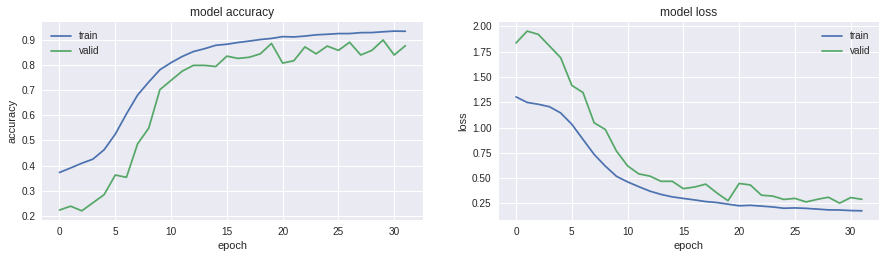

In [0]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(variable.history['acc'])  
plt.plot(variable.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(variable.history['loss'])  
plt.plot(variable.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()


In [0]:
import os
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image
import numpy as np
import cv2

In [0]:
target_size = (512,512)
model=load_model('/content/drive/My Drive/train/DRmodel.h5')
#print("model loaded")


In [0]:
f1 = open("/content/drive/My Drive/train/DRresults.csv",'w')


for root, dirs, files in os.walk("/content/drive/My Drive/train/test", topdown=False):
    if root == "/content/drive/My Drive/train/test":
        for name in dirs:
            TEST_DIR="/content/drive/My Drive/train/test/"+name+"/"  
            img_file=os.listdir(TEST_DIR)
            for f in (img_file):
                img = Image.open(TEST_DIR+f)
                img = cv2.imread(TEST_DIR+f)
                img = cv2.resize(img , target_size)
                x = image.img_to_array(img)
                #print(x.shape)
                x = np.expand_dims(x, axis=0)
                
                #np.delete(x,0)
                #print(x.shape)	
                #np.resize(x, [-1,300,300])
                preds = model.predict(x)
                pred_classes = preds.argmax(axis=-1)
                print(name,pred_classes)
                f1.write(name+"\t"+ str(pred_classes) +"\n")

f1.close()


class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [2]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [2]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [2]
class1 [1]
class1 [1]
class1 [1]
class1 [1]
class1 [0]
class1 [1]
class1 [1]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]
class0 [0]